# 필수 라이브러리 임포트

In [1]:
# 필수 라이브러리 
!pip install --upgrade joblib==1.1.0
!pip install --upgrade scikit-learn==1.1.3
!pip install mglearn

# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts

In [2]:
import logging

logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [3]:
import mglearn

from sklearn.model_selection import train_test_split 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.font_manager as fm
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

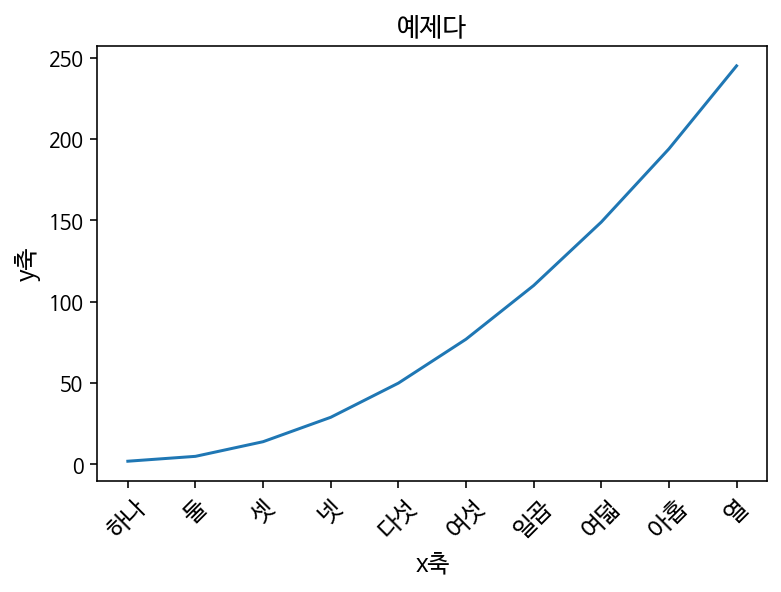

In [5]:
plt.plot([x for x in range(0, 10)], [(3*y**2)+2 for y in range(0, 10)])
plt.title("예제다", fontsize= 13)
plt.xlabel("x축", fontsize= 12)
plt.xticks(np.arange(0, 10, 1), ['하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열'], fontsize= 12, rotation= 45)
plt.ylabel("y축", fontsize= 12)
plt.show()

# 선형 회귀

시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록 몸무게는 줄어듭니다. 이처럼 수학적으로 생각해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고 있다고 말할 수 있습니다.   

다른 변수의 값을 변하게하는 변수를 x, 변수 x에 의해서 값이 종속적으로 변하는 변수 y라고 한다면, 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, 변수 y값은 계속해서 x의 값에 의해서 종속적으로 결정되므로,     
  
x를 독립변수, y를 종속변수라고 한다. 

## 단순 선형 회귀 분석(Simple Linear Regression Analysis)
$
y = wx + b
$    
  
위의 수식은 단순 선형 회귀의 수식을 보여줍니다. 여기서 독립변수 x와 곱해지는 값 w를 머신러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)이라고 합니다.

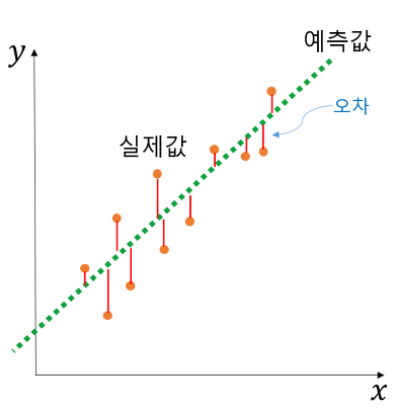

## 다중 선형 회귀 분석(Multiple Linear Regression Analysis)
$
y = w_1x_1 + w_2x_2 + ... + w_nx_n + b
$

집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층 수, 방의 개수, 지하철 역과의 거리 등에도 영향이 있습니다. 이러한 다수의 요소를 가지고 집의 매매 가격을 예측할때 다중 선형 회귀 분석을 사용합니다.

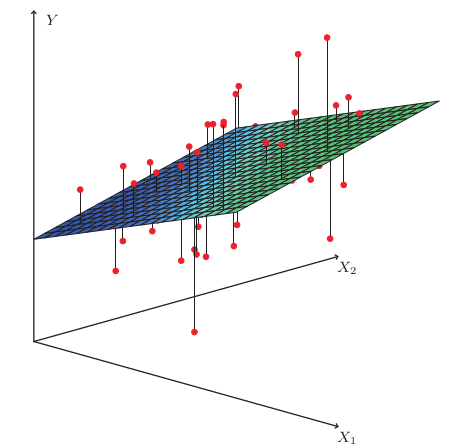

# 정규화(Regularization)

> 모델을 학습할 때는 비용(cost) 즉, 오류를 최소화하는 방향으로 진행이 됩니다.
  
> 이 비용(cost) 또는 손실(loss)이 얼마나 있는지 나타내는 것이 비용함수(Cost Function), 손실함수(Loss Function)이라고 합니다.

- W(weight)가 너무 큰 값들을 가지지 않도록 하는 것이다.
- W가 너무 큰 값을 가지게 되면 과하게 구불구불한 형태의 함수가 만들어지는데, Regularization은 이런 모델의 복잡도를 낮추기 위한 방법이다.
- Regularization은 단순하게 cost function을 작아지는 쪽으로 학습하면 특정 가중치 값들이 커지면서 결과를 나쁘게 만들기 때문에 cost function을 바꾼다.
  
Regularization에는 2가지 종규가 있다.

## [L1 Regularization](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#plot-regularization-path)
- 가중치의 합을 더한 값에 learning rate(학습률) $\lambda$ 를 곱하여 오차에 더한다. 

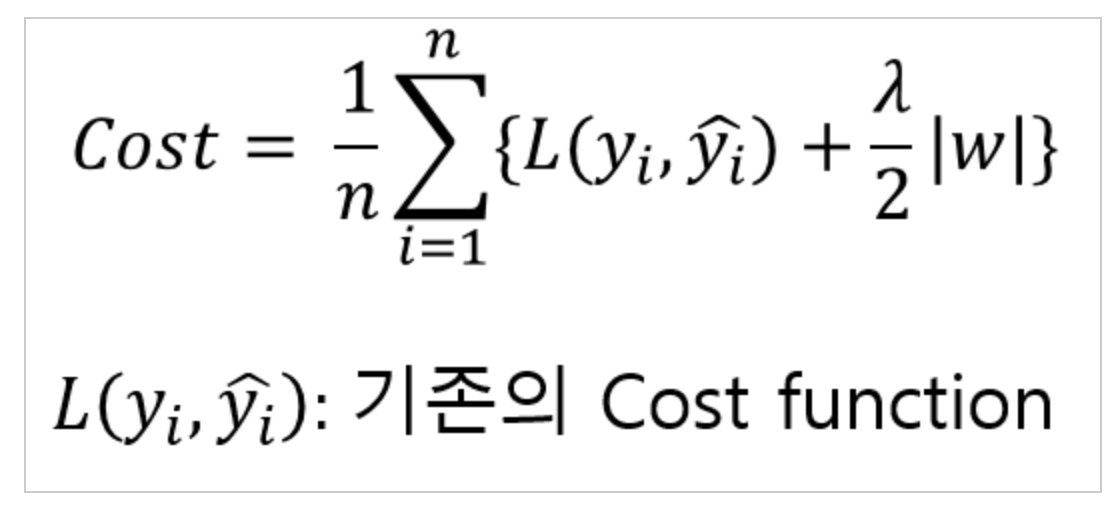

## [L2 Regularization](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html)
- 각 가중치 제곱의 합에 learning rate(학습률) $\lambda$ 를 곱한다.
- learning rate(학습률) $\lambda$ 를 크게 하면 가중치가 더 많이 감소되고, $\lambda$ 를 작게 하면 가중치가 증가한다.

> L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2 규제가 더 많이 사용된다.

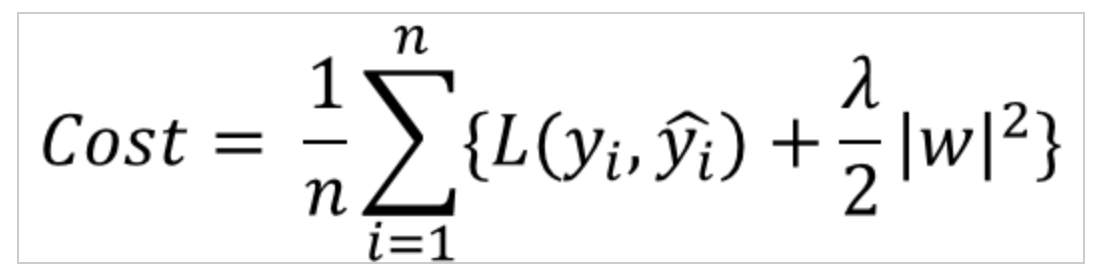

# 회귀의 선형 모델

## LinearRegression
> 최소제곱법(Ordinary Least Squares)을 활용.    
> 실제값에서 예측값을 뺀 차이의 제곱에 합

$$
\sum{(y_i - f(x_i))^2}
$$

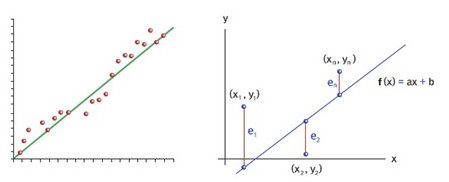

In [6]:
from sklearn.linear_model import LinearRegression 

데이터 로드

In [7]:
X, y = mglearn.datasets.load_extended_boston()
print(f'{X.shape} / {y.shape}')

(506, 104) / (506,)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


데이터 분리(학습용, 테스트용)

In [8]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_tr.shape: {X_tr.shape}') 

X_tr.shape: (379, 104)


선형 회귀 모델 정의

In [9]:
lr = LinearRegression() 

모델 학습

In [10]:
lr.fit(X_tr, y_tr) 

LinearRegression()

모델 학습 결과 확인

In [11]:
X_tr.shape

(379, 104)

In [12]:
print(f'bias: {lr.intercept_} / weights.shape: {lr.coef_.shape} \n\n  / weights: {lr.coef_}')

bias: 30.93456367364451 / weights.shape: (104,) 

  / weights: [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.7387191

학습한 모델을 이용한 검증 데이터 예측

In [13]:
pred = lr.predict(X_te)
pred[:5]

array([23.65294082, 26.73756431, 29.61078314, 10.15490293, 19.63821608])

In [14]:
X_te.shape, X_tr.shape

((127, 104), (379, 104))

In [15]:
pred.shape, y_te.shape, X_te.shape

((127,), (127,), (127, 104))

모델 평가
> 훈련용 평가지표는 0.95가 넘지만, 테스트용 평가지표는 0.61임으로 이 모델은 Overfitting 된 모델이다.

In [16]:
# 기본 평가지표는 결정계수이다. 결정계수는 0 ~ 1 사이 값을 갖으며, 1에 가까울 수록 정확도가 높다는 뜻이다.
print(f'훈련용 평가지표: {lr.score(X_tr, y_tr)} / 테스트용 평가지표: {lr.score(X_te, y_te)}')

훈련용 평가지표: 0.9520519609032727 / 테스트용 평가지표: 0.6074721959665794


## Ridge with L2
> 선형회귀에 L2 규제 적용

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge().fit(X_tr, y_tr) 

L2 규제가 적용된 Ridge를 사용하여 훈련용 평가지표는 LinearRegression보다 낮지만, 테스트용 평가지표는 높은 것을 확인할 수 있다.

In [19]:
print(f'훈련용 평가지표: {ridge.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge.score(X_te, y_te)}')

훈련용 평가지표: 0.8857966585170941 / 테스트용 평가지표: 0.7527683481744752


- alpha 값을 낮추면 규제의 효과가 없어져 과대적합이 될 가능성이 높아집니다.   
- alpha 값을 높이면 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.    
   
실제로 훈련용 평가지표와 테스트용 평가지표의 차이가 줄어든 것을 확인할 수 있다.

In [20]:
ridge10 = Ridge(alpha=10).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {ridge10.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge10.score(X_te, y_te)}')

훈련용 평가지표: 0.7882787115369614 / 테스트용 평가지표: 0.6359411489177309


In [21]:
ridge01 = Ridge(alpha=0.1).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {ridge01.score(X_tr, y_tr)} / 테스트용 평가지표: {ridge01.score(X_te, y_te)}')

훈련용 평가지표: 0.9282273685001993 / 테스트용 평가지표: 0.7722067936479827


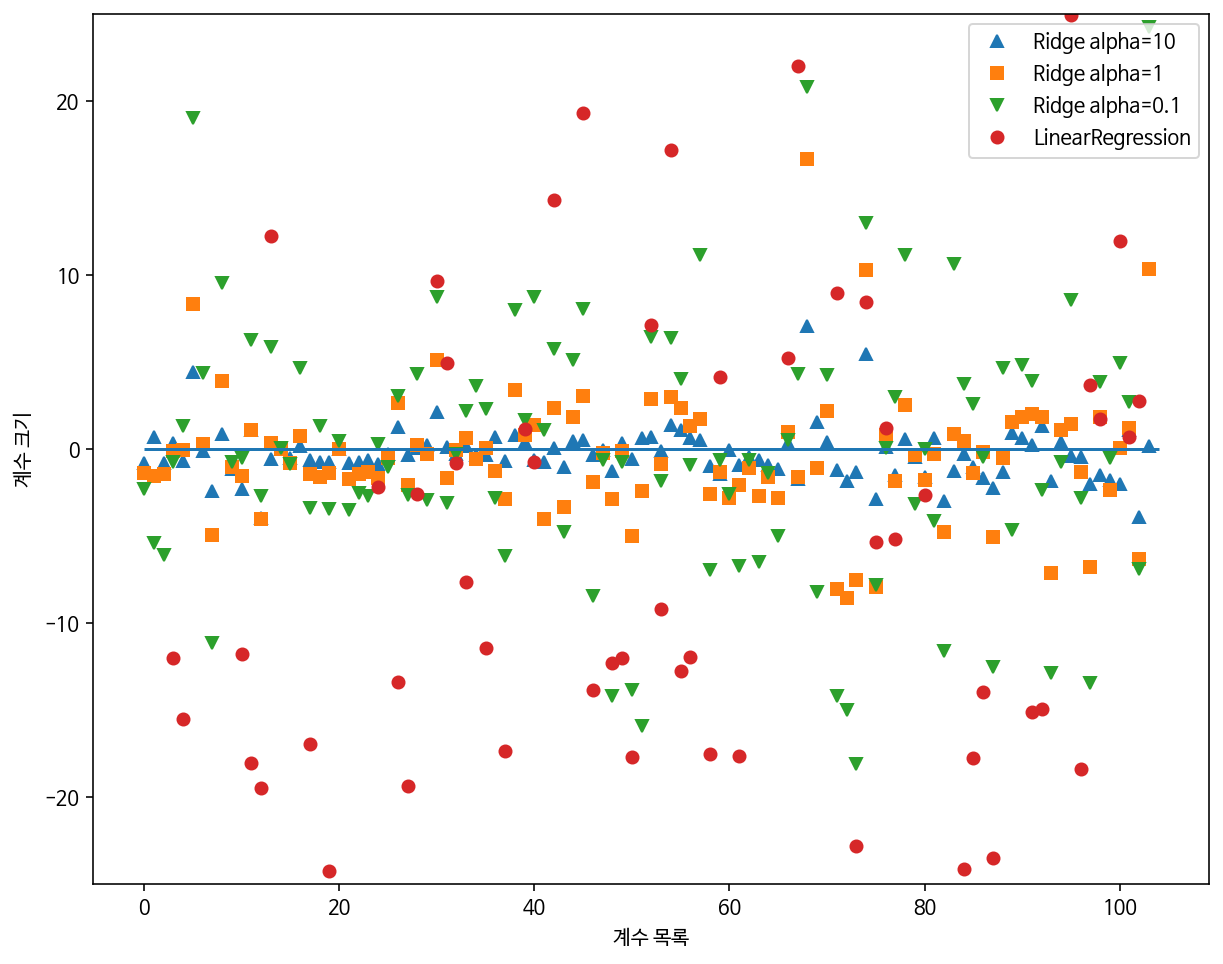

In [22]:
plt.figure(figsize=(10,8))

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Ridge에서 alpha값이 클 수록 각각의 계수 크기가 작아지는 경향을 볼 수 있습니다. 따라서 L2 규제가 강해진다고 할 수 있으며, 이는 과적합이 될 가능성이 낮아진다는 뜻입니다.    
  
하지만 aplha값을 아무리 높이더라도 Ridge의 계수크기가 0이 되지는 않습니다.

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


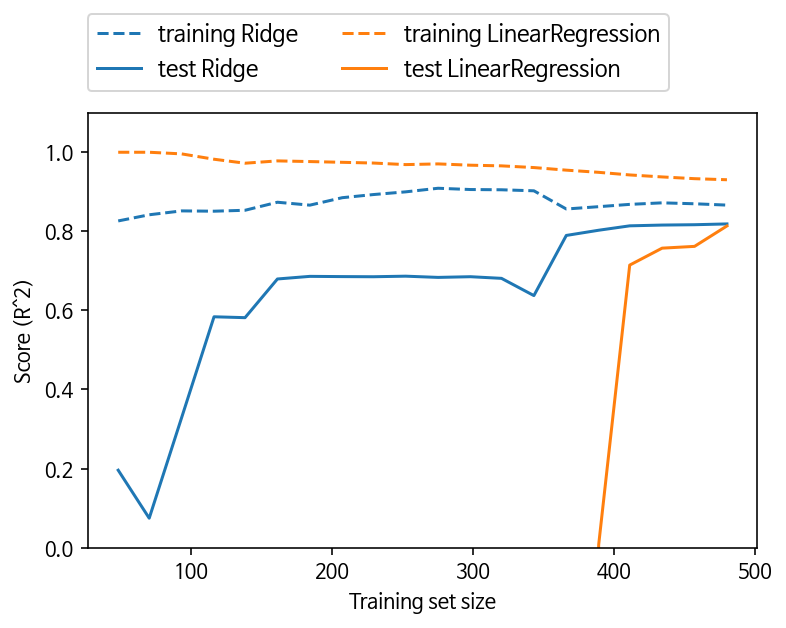

In [23]:
mglearn.plots.plot_ridge_n_samples()

위의 그래프는 보스턴 주택가격 데이터셋에서 여러 가지 크기로 샘플링하여 LinearRegression과 Ridge를 적용한 것이다.  
  
여기서 배울 수 있는 것은 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이라는 점이다. 

## Lasso with L1
> L1 규제를 사용하면, 실제로 일부 피쳐들의 계수(weight)가 0이 된다. 이 말은 모델에서 완전히 제외되는 특성(피쳐)이 생긴다는 뜻이다.    
> 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.  
  
alpha값을 줄이면 가장 낮은 오차를 찾아가는 반복횟수(max_iter)가 늘어나야 합니다.

In [24]:
from sklearn.linear_model import Lasso 

In [25]:
lasso = Lasso().fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {lasso.score(X_tr, y_tr)} / 테스트용 평가지표: {lasso.score(X_te, y_te)}')
print('-'*80)
print(f'사용한 특성의 수: {np.sum(lasso.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')

훈련용 평가지표: 0.29323768991114607 / 테스트용 평가지표: 0.20937503255272294
--------------------------------------------------------------------------------
사용한 특성의 수: 4 / 전체 특성 수: 104


In [26]:
# alpha값을 변경할 때는 max_iter를 증가 시켜야 한다.
lass001 = Lasso(alpha=0.01, max_iter=100000).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {lass001.score(X_tr, y_tr)} / 테스트용 평가지표: {lass001.score(X_te, y_te)}')
print(f'사용한 특성의 수: {np.sum(lass001.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')

훈련용 평가지표: 0.8962226511086497 / 테스트용 평가지표: 0.7656571174549982
사용한 특성의 수: 33 / 전체 특성 수: 104


In [27]:
lass00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {lass00001.score(X_tr, y_tr)} / 테스트용 평가지표: {lass00001.score(X_te, y_te)}')
print(f'사용한 특성의 수: {np.sum(lass00001.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')

훈련용 평가지표: 0.9507158754515463 / 테스트용 평가지표: 0.6437467421272821
사용한 특성의 수: 96 / 전체 특성 수: 104


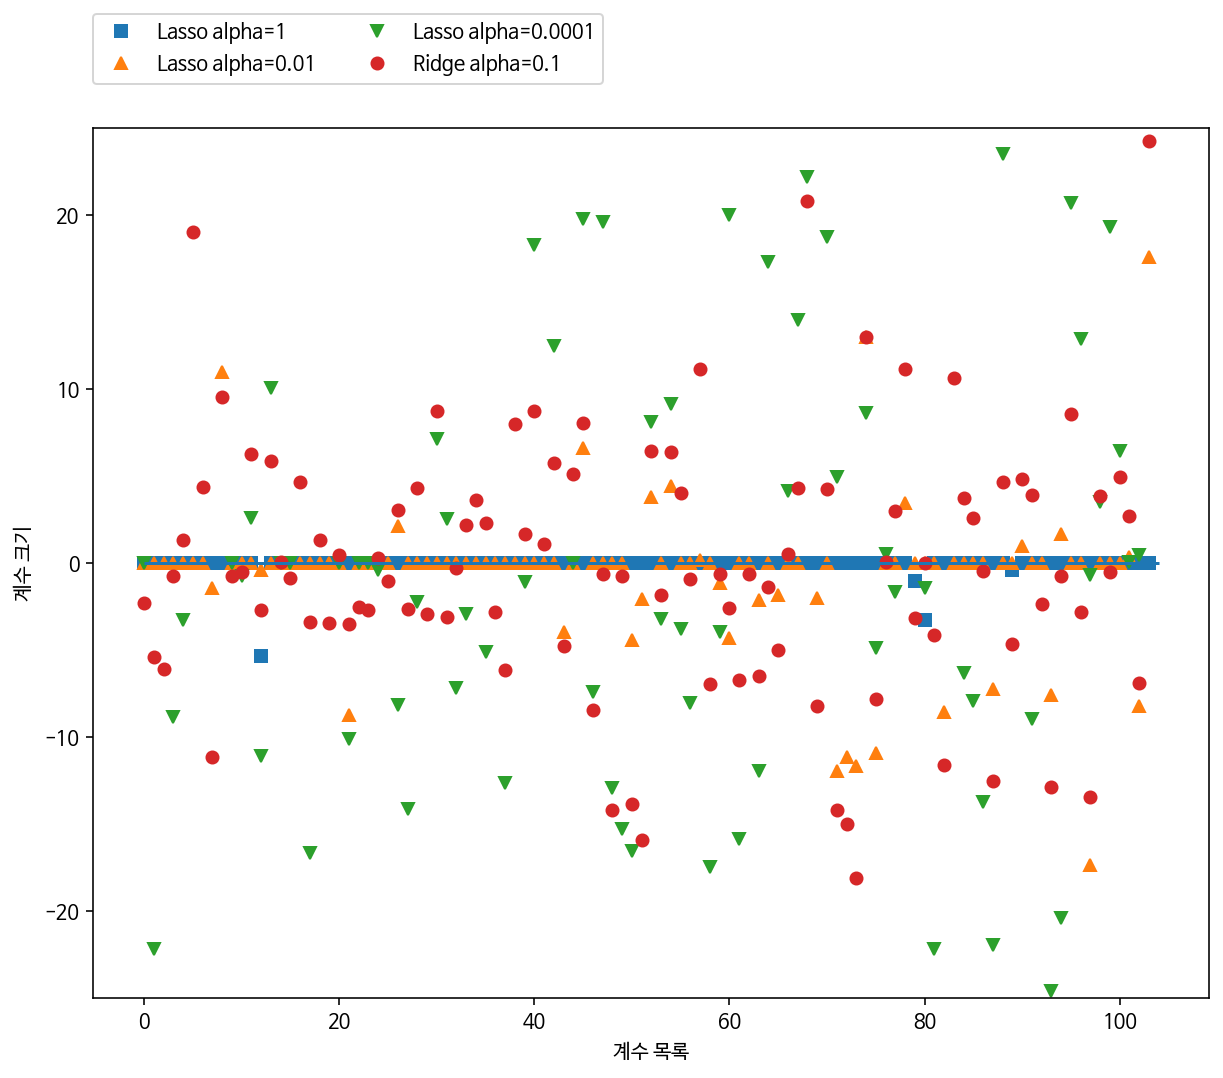

In [28]:
plt.figure(figsize=(10,8))

plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lass001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lass00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## ElasticNet
> 선형회귀에 L1규제, L2규제를 동시에 적용한 모델이다.
- 주요 파라미터
  - alpha: 규제 계수
  - l1_ratio(default=0.5)
    - 0이면, L2 규제만
    - 1이면, L1 규제만
    - 0 < l1_ratio < 1이면, 혼합

In [29]:
from sklearn.linear_model import ElasticNet

In [30]:
elnet = ElasticNet().fit(X_tr, y_tr) 
print(f'훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}')
print(f'사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')

훈련용 평가지표: 0.32837814485847916 / 테스트용 평가지표: 0.2217004367773664
사용한 특성의 수: 38 / 전체 특성 수: 104


In [31]:
alpha=0.01
ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
  elnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42).fit(X_tr, y_tr) 
  print(f'ratio: {ratio}')
  print(f'훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}')
  print(f'사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')
  print('-'*50)

ratio: 0.2
훈련용 평가지표: 0.8421033820826037 / 테스트용 평가지표: 0.7055067157435387
사용한 특성의 수: 93 / 전체 특성 수: 104
--------------------------------------------------
ratio: 0.5
훈련용 평가지표: 0.8553665697077995 / 테스트용 평가지표: 0.7209054027265394
사용한 특성의 수: 84 / 전체 특성 수: 104
--------------------------------------------------
ratio: 0.8
훈련용 평가지표: 0.8752442706471416 / 테스트용 평가지표: 0.741439523522267
사용한 특성의 수: 63 / 전체 특성 수: 104
--------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [32]:
alphas=[0.001, 0.01, 0.1]
ratio = 0.8

for alpha in alphas:
  elnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42).fit(X_tr, y_tr) 
  print(f'alpha: {alpha}')
  print(f'훈련용 평가지표: {elnet.score(X_tr, y_tr)} / 테스트용 평가지표: {elnet.score(X_te, y_te)}')
  print(f'사용한 특성의 수: {np.sum(elnet.coef_ != 0)} / 전체 특성 수: {X_tr.shape[1]}')
  print('-'*50)

alpha: 0.001
훈련용 평가지표: 0.9271504286329 / 테스트용 평가지표: 0.7813331506633265
사용한 특성의 수: 91 / 전체 특성 수: 104
--------------------------------------------------
alpha: 0.01
훈련용 평가지표: 0.8752442706471416 / 테스트용 평가지표: 0.741439523522267
사용한 특성의 수: 63 / 전체 특성 수: 104
--------------------------------------------------
alpha: 0.1
훈련용 평가지표: 0.7399596108844948 / 테스트용 평가지표: 0.5768205411208096
사용한 특성의 수: 33 / 전체 특성 수: 104
--------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
